In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 18})
import seaborn as sns
import regex as re
import os
import numpy as np
from ast import literal_eval

In [2]:
plt.rcParams.update({'font.size': 24})

In [ ]:
! cd ../results && pwd && find ~+ -type f -name "parameters.txt"

In [13]:
result_paths_outlier = [
    "/mnt/extra/continuous-training/results/1718055613067343110/",
    "/mnt/extra/continuous-training/results/1718054498557168214/",
    "/mnt/extra/continuous-training/results/1718046525457971171/",
    "/mnt/extra/continuous-training/results/1718045790618772077/",
    "/mnt/extra/continuous-training/results/1718047412973929580/",
]
result_paths_quartile = [
    "/mnt/extra/continuous-training/results/1718055621292063019",
    "/mnt/extra/continuous-training/results/1718054518462346338/",
    "/mnt/extra/continuous-training/results/1718046520146433230/",
    "/mnt/extra/continuous-training/results/1718045808176367416/",
    "/mnt/extra/continuous-training/results/1718047408387065990/",
]

In [14]:
stats_df_outlier = pd.DataFrame(columns=['folder_path', 'algo', 'threshold', 'param_path', 'csv_path', 'latencies_path', 'num_retrain', 'training_time_total', 'training_time_single', 'training_cpu_time', 'training_counter', 'inference_time_total', 'inference_time_single', 'inference_cpu_time', 'inference_counter'])
idx_mapping = {
    0: 0.5,
    1: 1,
    2: 5,
    3: 10,
    4: 15,
}
for idx, stat in enumerate(result_paths_outlier):
    contents = []
    with open(os.path.join(stat, 'parameters.txt'), "r") as f:
        contents = f.readlines()
    # Iterate to get variables
    folder_path = stat
    algo_name = 'nn_clf_outlier'
    csv_path = os.path.join(folder_path, 'nn_clf_outlier.csv')
    latencies_path = os.path.join(folder_path, 'latencies.csv')
    param_path = stat
    valid_entry = False
    retrained = -1
    training_time_total = -1
    training_time_single = -1
    training_cpu_time = -1
    training_counter = -1
    inference_time_total = -1
    inference_time_single = -1
    inference_cpu_time = -1
    inference_counter = -1
    for content in contents:
        if not valid_entry and 'Inference' in content:
            valid_entry = True
        if 'Retrained' in content:
            retrained = float(content.split(' = ')[1].split('\n')[0])
        if 'Training time total' in content:
            training_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Training time single' in content:
            training_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Training CPU times usage' in content:
            training_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Training counter' in content:
            training_counter = float(content.split(' = ')[1].split('\n')[0])
        if 'Inference time total' in content:
            inference_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference time single' in content:
            inference_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference CPU times usage' in content:
            inference_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Inference counter' in content:
            inference_counter = float(content.split(' = ')[1].split('\n')[0])
    if valid_entry:
        stats_df_outlier.loc[len(stats_df_outlier)] = [folder_path, algo_name, idx_mapping[idx], param_path, csv_path, latencies_path, retrained, training_time_total, training_time_single, training_cpu_time, training_counter, inference_time_total, inference_time_single, inference_cpu_time, inference_counter]
stats_df_outlier

,folder_path,algo,threshold,param_path,csv_path,latencies_path,num_retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1718055...,nn_clf_outlier,0.5,/mnt/extra/continuous-training/results/1718055...,/mnt/extra/continuous-training/results/1718055...,/mnt/extra/continuous-training/results/1718055...,8.0,423.603148,47.067016,3831.35,9.0,345.960681,0.000012,1698.89,28686125.0
1,/mnt/extra/continuous-training/results/1718054...,nn_clf_outlier,1.0,/mnt/extra/continuous-training/results/1718054...,/mnt/extra/continuous-training/results/1718054...,/mnt/extra/continuous-training/results/1718054...,3.0,273.086047,68.271512,2490.49,4.0,306.094884,0.000011,1132.50,28686125.0
2,/mnt/extra/continuous-training/results/1718046...,nn_clf_outlier,5.0,/mnt/extra/continuous-training/results/1718046...,/mnt/extra/continuous-training/results/1718046...,/mnt/extra/continuous-training/results/1718046...,0.0,85.571161,85.571161,1066.18,1.0,323.010418,0.000011,1307.76,28686125.0
3,/mnt/extra/continuous-training/results/1718045...,nn_clf_outlier,10.0,/mnt/extra/continuous-training/results/1718045...,/mnt/extra/continuous-training/results/1718045...,/mnt/extra/continuous-training/results/1718045...,0.0,93.845454,93.845454,817.71,1.0,309.361297,0.000011,1076.07,28686125.0
4,/mnt/extra/continuous-training/results/1718047...,nn_clf_outlier,15.0,/mnt/extra/continuous-training/results/1718047...,/mnt/extra/continuous-training/results/1718047...,/mnt/extra/continuous-training/results/1718047...,0.0,120.180301,120.180301,1306.38,1.0,299.541631,0.000010,1215.39,28686125.0


In [15]:
stats_df_quartile = pd.DataFrame(columns=['folder_path', 'algo', 'threshold', 'param_path', 'csv_path', 'latencies_path', 'num_retrain', 'training_time_total', 'training_time_single', 'training_cpu_time', 'training_counter', 'inference_time_total', 'inference_time_single', 'inference_cpu_time', 'inference_counter'])

for idx, stat in enumerate(result_paths_quartile):
    contents = []
    with open(os.path.join(stat, 'parameters.txt'), "r") as f:
        contents = f.readlines()
    # Iterate to get variables
    folder_path = stat
    algo_name = 'nn_clf_quartile'
    csv_path = os.path.join(folder_path, 'nn_clf_quartile.csv')
    latencies_path = os.path.join(folder_path, 'latencies.csv')
    param_path = stat
    valid_entry = False
    retrained = -1
    training_time_total = -1
    training_time_single = -1
    training_cpu_time = -1
    training_counter = -1
    inference_time_total = -1
    inference_time_single = -1
    inference_cpu_time = -1
    inference_counter = -1
    for content in contents:
        if not valid_entry and 'Inference' in content:
            valid_entry = True
        if 'Retrained' in content:
            retrained = float(content.split(' = ')[1].split('\n')[0])
        if 'Training time total' in content:
            training_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Training time single' in content:
            training_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Training CPU times usage' in content:
            training_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Training counter' in content:
            training_counter = float(content.split(' = ')[1].split('\n')[0])
        if 'Inference time total' in content:
            inference_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference time single' in content:
            inference_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference CPU times usage' in content:
            inference_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Inference counter' in content:
            inference_counter = float(content.split(' = ')[1].split('\n')[0])
    if valid_entry:
        stats_df_quartile.loc[len(stats_df_quartile)] = [folder_path, algo_name, idx_mapping[idx], param_path, csv_path, latencies_path, retrained, training_time_total, training_time_single, training_cpu_time, training_counter, inference_time_total, inference_time_single, inference_cpu_time, inference_counter]
stats_df_quartile

,folder_path,algo,threshold,param_path,csv_path,latencies_path,num_retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1718055...,nn_clf_quartile,0.5,/mnt/extra/continuous-training/results/1718055...,/mnt/extra/continuous-training/results/1718055...,/mnt/extra/continuous-training/results/1718055...,0.0,131.361375,131.361375,1658.88,1.0,331.742471,0.000012,2048.82,28686125.0
1,/mnt/extra/continuous-training/results/1718054...,nn_clf_quartile,1.0,/mnt/extra/continuous-training/results/1718054...,/mnt/extra/continuous-training/results/1718054...,/mnt/extra/continuous-training/results/1718054...,0.0,94.812988,94.812988,1195.44,1.0,343.371562,0.000012,1695.92,28686125.0
2,/mnt/extra/continuous-training/results/1718046...,nn_clf_quartile,5.0,/mnt/extra/continuous-training/results/1718046...,/mnt/extra/continuous-training/results/1718046...,/mnt/extra/continuous-training/results/1718046...,0.0,114.297386,114.297386,1274.57,1.0,311.688745,0.000011,1200.73,28686125.0
3,/mnt/extra/continuous-training/results/1718045...,nn_clf_quartile,10.0,/mnt/extra/continuous-training/results/1718045...,/mnt/extra/continuous-training/results/1718045...,/mnt/extra/continuous-training/results/1718045...,0.0,110.697164,110.697164,927.76,1.0,301.810553,0.000011,961.75,28686125.0
4,/mnt/extra/continuous-training/results/1718047...,nn_clf_quartile,15.0,/mnt/extra/continuous-training/results/1718047...,/mnt/extra/continuous-training/results/1718047...,/mnt/extra/continuous-training/results/1718047...,0.0,114.223649,114.223649,1257.13,1.0,305.965608,0.000011,1241.59,28686125.0


In [16]:
values_df_outlier = pd.DataFrame({
    'threshold': pd.Series(dtype='int'),
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    'latencies_acc': pd.Series(dtype='object'),
    'latencies_rej': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
    'training_time_total': pd.Series(dtype='float'),
    'training_time_single': pd.Series(dtype='float'),
    'training_cpu_time': pd.Series(dtype='float'),
    'training_counter': pd.Series(dtype='int'),
    'inference_time_total': pd.Series(dtype='float'),
    'inference_time_single': pd.Series(dtype='float'),
    'inference_cpu_time': pd.Series(dtype='float'),
    'inference_counter': pd.Series(dtype='int'),
})

for i, row in stats_df_outlier.iterrows():
    temp_df = pd.read_csv(os.path.join(row['folder_path'], row['csv_path']), index_col=0)
    temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
    retrain_list = temp_df['retrain'].tolist()
    retrain = [i for i in retrain_list if i==True]
    latencies_df = pd.read_csv(row['latencies_path'], header=None, names=['latency', 'reject'], dtype={'latency': int, 'reject': str})
    latencies_acc = latencies_df[latencies_df['reject'].isin(["0", "True"])]['latency'].tolist()
    latencies_rej = latencies_df[latencies_df['reject'].isin(["1", "False"])]['latency'].tolist()
    # if temp_df['minute'].max() == 480:
    # if i != 3:
    #     values_df_outlier.loc[len(values_df_outlier)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]
    # else:
    values_df_outlier.loc[len(values_df_outlier)] = [row['threshold'], row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), latencies_acc, latencies_rej, row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]

# print(values_df_outlier.iloc[13]['path'])
# values_df_outlier.drop([13], inplace=True)
values_df_outlier.reset_index(inplace=True, drop=True)
# values_df_outlier.to_csv('values_all_minmax.csv')
values_df_outlier

,threshold,path,algo,length,f1,roc_auc,latencies_acc,latencies_rej,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,0.5,/mnt/extra/continuous-training/results/1718055...,nn_clf_outlier,30,"[0.9135471196938572, 0.9105257096008352, 0.904...","[0.7674472468149495, 0.7649582730126003, 0.830...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 211, 137, 67, 411, 93, 299, 390, 72...",8.0,423.603148,47.067016,3831.35,9.0,345.960681,0.000012,1698.89,28686125.0
1,1.0,/mnt/extra/continuous-training/results/1718054...,nn_clf_outlier,30,"[0.9168742274700772, 0.9141480020560356, 0.902...","[0.7864999252833701, 0.7846469134448952, 0.792...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 194, 230, 211, 137, 67, 411, 93, 29...",3.0,273.086047,68.271512,2490.49,4.0,306.094884,0.000011,1132.50,28686125.0
2,5.0,/mnt/extra/continuous-training/results/1718046...,nn_clf_outlier,30,"[0.9140496909297804, 0.911338854978776, 0.8995...","[0.773446212118971, 0.7717452819734556, 0.7794...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 194, 211, 137, 67, 411, 488, 93, 29...",0.0,85.571161,85.571161,1066.18,1.0,323.010418,0.000011,1307.76,28686125.0
3,10.0,/mnt/extra/continuous-training/results/1718045...,nn_clf_outlier,30,"[0.9145862439381802, 0.912063275051269, 0.9004...","[0.7811900938802347, 0.779390939773621, 0.7865...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 211, 137, 285, 67, 411, 488, 93, 29...",0.0,93.845454,93.845454,817.71,1.0,309.361297,0.000011,1076.07,28686125.0
4,15.0,/mnt/extra/continuous-training/results/1718047...,nn_clf_outlier,30,"[0.917774644187424, 0.9148274741714824, 0.9037...","[0.7851769126449838, 0.7827196769275052, 0.790...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 194, 230, 211, 137, 67, 411, 93, 29...",0.0,120.180301,120.180301,1306.38,1.0,299.541631,0.000010,1215.39,28686125.0


In [17]:
values_df_quartile = pd.DataFrame({
    'threshold': pd.Series(dtype='int'),
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    'latencies_acc': pd.Series(dtype='object'),
    'latencies_rej': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
    'training_time_total': pd.Series(dtype='float'),
    'training_time_single': pd.Series(dtype='float'),
    'training_cpu_time': pd.Series(dtype='float'),
    'training_counter': pd.Series(dtype='int'),
    'inference_time_total': pd.Series(dtype='float'),
    'inference_time_single': pd.Series(dtype='float'),
    'inference_cpu_time': pd.Series(dtype='float'),
    'inference_counter': pd.Series(dtype='int'),
})

for i, row in stats_df_quartile.iterrows():
    temp_df = pd.read_csv(os.path.join(row['folder_path'], row['csv_path']), index_col=0)
    temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
    retrain_list = temp_df['retrain'].tolist()
    retrain = [i for i in retrain_list if i==True]
    latencies_df = pd.read_csv(row['latencies_path'], header=None, names=['latency', 'reject'], dtype={'latency': int, 'reject': str})
    latencies_acc = latencies_df[latencies_df['reject'].isin(["0", "True"])]['latency'].tolist()
    latencies_rej = latencies_df[latencies_df['reject'].isin(["1", "False"])]['latency'].tolist()
    # if temp_df['minute'].max() == 480:
    # if i != 3:
    #     values_df_quartile.loc[len(values_df_quartile)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]
    # else:
    values_df_quartile.loc[len(values_df_quartile)] = [row['threshold'], row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), latencies_acc, latencies_rej, row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]

# print(values_df_quartile.iloc[13]['path'])
# values_df_quartile.drop([13], inplace=True)
values_df_quartile.reset_index(inplace=True, drop=True)
# values_df_quartile.to_csv('values_all_minmax.csv')
values_df_quartile

,threshold,path,algo,length,f1,roc_auc,latencies_acc,latencies_rej,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,0.5,/mnt/extra/continuous-training/results/1718055...,nn_clf_quartile,30,"[0.918587164369373, 0.915975056298723, 0.90521...","[0.792899526596954, 0.7905949804399925, 0.7984...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 211, 137, 579, 285, 67, 411, 59, 93...",0.0,131.361375,131.361375,1658.88,1.0,331.742471,0.000012,2048.82,28686125.0
1,1.0,/mnt/extra/continuous-training/results/1718054...,nn_clf_quartile,30,"[0.9139262034458112, 0.911187609920544, 0.8990...","[0.7698852370145247, 0.7677582920018664, 0.775...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 211, 137, 67, 411, 93, 299, 390, 72...",0.0,94.812988,94.812988,1195.44,1.0,343.371562,0.000012,1695.92,28686125.0
2,5.0,/mnt/extra/continuous-training/results/1718046...,nn_clf_quartile,30,"[0.9180436071830016, 0.915466279128589, 0.9041...","[0.7873638553843126, 0.7858441242220822, 0.792...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 211, 137, 67, 411, 488, 93, 299, 72...",0.0,114.297386,114.297386,1274.57,1.0,311.688745,0.000011,1200.73,28686125.0
3,10.0,/mnt/extra/continuous-training/results/1718045...,nn_clf_quartile,30,"[0.9160395725686996, 0.913449247868436, 0.9019...","[0.7808146026274941, 0.7790593466205864, 0.786...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 230, 211, 137, 67, 411, 93, 299, 39...",0.0,110.697164,110.697164,927.76,1.0,301.810553,0.000011,961.75,28686125.0
4,15.0,/mnt/extra/continuous-training/results/1718047...,nn_clf_quartile,30,"[0.9165532699306684, 0.9140744562807928, 0.902...","[0.787445184909335, 0.7862046089498136, 0.7934...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[436, 360, 211, 137, 67, 411, 488, 93, 299, 39...",0.0,114.223649,114.223649,1257.13,1.0,305.965608,0.000011,1241.59,28686125.0


In [38]:
df_plot = values_df_outlier.copy(deep=True)
df_plot['id'] = df_plot['threshold']
df_plot

,threshold,path,algo,length,f1,roc_auc,latencies_acc,latencies_rej,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter,id
0,0.5,/mnt/extra/continuous-training/results/1718055...,nn_clf_outlier,30,"[0.9135471196938572, 0.9105257096008352, 0.904...","[0.7674472468149495, 0.7649582730126003, 0.830...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 211, 137, 67, 411, 93, 299, 390, 72...",8.0,423.603148,47.067016,3831.35,9.0,345.960681,0.000012,1698.89,28686125.0,0.5
1,1.0,/mnt/extra/continuous-training/results/1718054...,nn_clf_outlier,30,"[0.9168742274700772, 0.9141480020560356, 0.902...","[0.7864999252833701, 0.7846469134448952, 0.792...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 194, 230, 211, 137, 67, 411, 93, 29...",3.0,273.086047,68.271512,2490.49,4.0,306.094884,0.000011,1132.50,28686125.0,1.0
2,5.0,/mnt/extra/continuous-training/results/1718046...,nn_clf_outlier,30,"[0.9140496909297804, 0.911338854978776, 0.8995...","[0.773446212118971, 0.7717452819734556, 0.7794...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 194, 211, 137, 67, 411, 488, 93, 29...",0.0,85.571161,85.571161,1066.18,1.0,323.010418,0.000011,1307.76,28686125.0,5.0
3,10.0,/mnt/extra/continuous-training/results/1718045...,nn_clf_outlier,30,"[0.9145862439381802, 0.912063275051269, 0.9004...","[0.7811900938802347, 0.779390939773621, 0.7865...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 211, 137, 285, 67, 411, 488, 93, 29...",0.0,93.845454,93.845454,817.71,1.0,309.361297,0.000011,1076.07,28686125.0,10.0
4,15.0,/mnt/extra/continuous-training/results/1718047...,nn_clf_outlier,30,"[0.917774644187424, 0.9148274741714824, 0.9037...","[0.7851769126449838, 0.7827196769275052, 0.790...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 194, 230, 211, 137, 67, 411, 93, 29...",0.0,120.180301,120.180301,1306.38,1.0,299.541631,0.000010,1215.39,28686125.0,15.0


In [39]:
plot_df = pd.DataFrame(columns=df_plot['threshold'].tolist())
f1s = df_plot['roc_auc'].tolist()
for i in range(0, 30):
    plot_df.loc[len(plot_df)] = [f1s[0][i], f1s[1][i], f1s[2][i], f1s[3][i], f1s[4][i]]

plot_df

,0.5,1.0,5.0,10.0,15.0
0,0.767447,0.786500,0.773446,0.781190,0.785177
1,0.764958,0.784647,0.771745,0.779391,0.782720
2,0.830362,0.792083,0.779409,0.786548,0.790516
3,0.829496,0.790368,0.775806,0.784428,0.788909
4,0.804953,0.790868,0.777972,0.785824,0.789036
5,0.761940,0.743613,0.728899,0.739677,0.744021
6,0.758601,0.740193,0.726434,0.737078,0.740298
7,0.762757,0.745513,0.731902,0.741690,0.744953
8,0.761920,0.743995,0.730777,0.740261,0.743911
9,0.757818,0.741747,0.729324,0.738108,0.740893


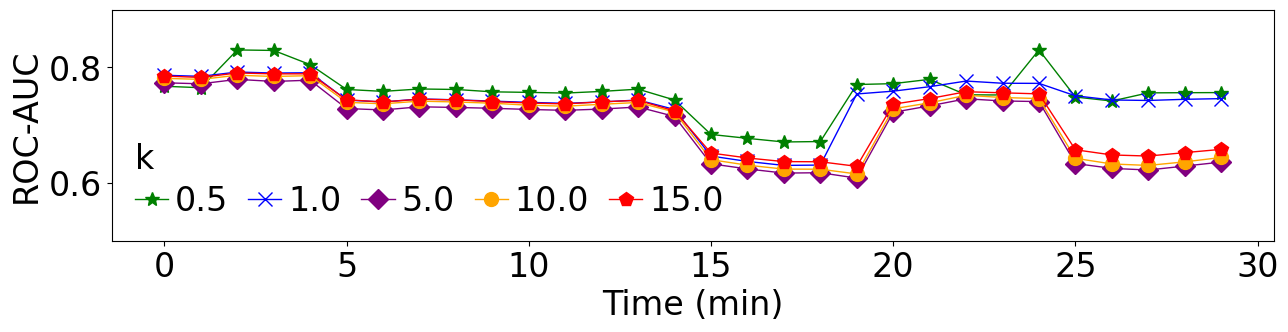

In [40]:
fig, ax = plt.subplots(figsize=(15, 3))

colors = ['green', 'blue', 'purple', 'orange', 'red']
markers = ['*', 'x', 'D', 'o', 'p']

for idx, col in enumerate(plot_df.columns):
    plt.plot(plot_df.index, plot_df[col], label=col, color=colors[idx], linewidth=1, marker=markers[idx], markersize=10)
plt.legend(ncol=5, loc="best",
           title="k", alignment='left', 
           frameon=False, facecolor=(1, 1, 1, 0), 
            edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.5, 0.9)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()

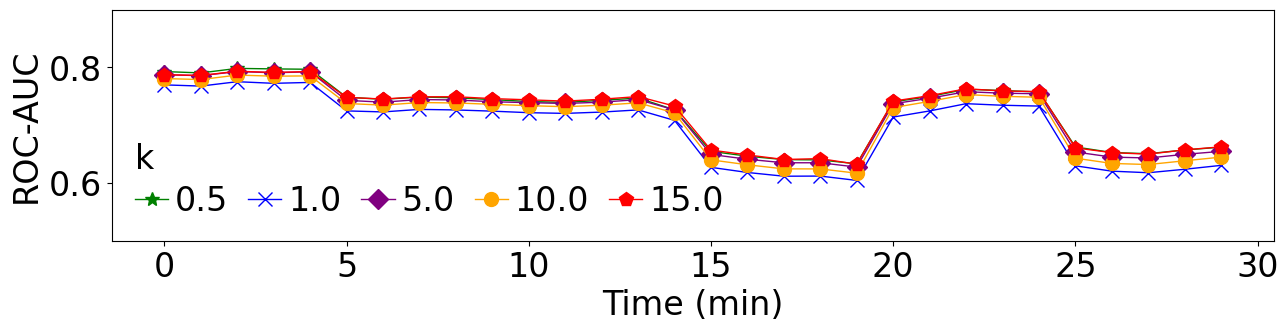

In [41]:
df_plot = values_df_quartile.copy(deep=True)
df_plot['id'] = df_plot['threshold']

plot_df = pd.DataFrame(columns=df_plot['threshold'].tolist())
f1s = df_plot['roc_auc'].tolist()
for i in range(0, 30):
    plot_df.loc[len(plot_df)] = [f1s[0][i], f1s[1][i], f1s[2][i], f1s[3][i], f1s[4][i]]

fig, ax = plt.subplots(figsize=(15, 3))

colors = ['green', 'blue', 'purple', 'orange', 'red']
markers = ['*', 'x', 'D', 'o', 'p']

for idx, col in enumerate(plot_df.columns):
    plt.plot(plot_df.index, plot_df[col], label=col, color=colors[idx], linewidth=1, marker=markers[idx], markersize=10)
plt.legend(ncol=5, loc="best",
           title="k", alignment='left', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.5, 0.9)
plt.xlabel('Time (min)')
plt.ylabel('ROC-AUC')
plt.show()